# RT Follow-up Analysis

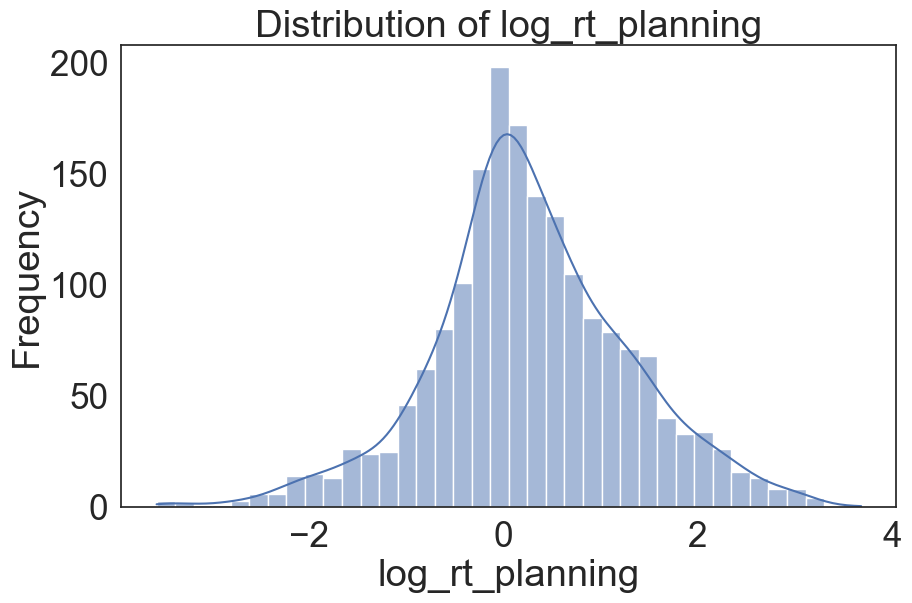

here
Pearson correlation between PR Evidence and log_rt_planning: -0.0007366303649988352
Pearson correlation between PR and Bias BR: -0.015194253285910777


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import bambi as bmb

# Load data
df = pd.read_csv('all_rt_data_filled.csv')
df['log_rt_planning'] = np.log(df['rt_planning_pr']/df['median_RT_actionselection'])
df=df.fillna(1)
df=df[df['log_rt_planning']>-4]
df=df[df['log_rt_planning']<4]

# 2. Plot log reaction times using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['log_rt_planning'], kde=True)
plt.title('Distribution of log_rt_planning')
plt.xlabel('log_rt_planning')
plt.ylabel('Frequency')
plt.show()

print('here')

# 3. Calculate and print Pearson correlation
correlation, _ = stats.pearsonr(df['PR Evidence'], df['log_rt_planning'])

print(f'Pearson correlation between PR Evidence and log_rt_planning: {correlation}')
correlation, _ = stats.pearsonr(df['PR Evidence'], df['bias_highbaserate'])
df['PR']=df['PR Evidence']
print(f'Pearson correlation between PR and Bias BR: {correlation}')
df['trial_num']=df['trial_num']-df['trial_num'].mean()/df['trial_num'].std()
df['PR']=df['PR']-df['PR'].mean()/df['PR'].std()
df['bias_highbaserate']=df['bias_highbaserate']-df['bias_highbaserate'].mean()/df['bias_highbaserate'].std()

df.to_csv('rt_all_normalized_full.csv')

# 4. Hierarchical regression using Bambi
# model2 = bmb.Model("log_rt_planning ~ PR_individual_answers+PR+bias_highbaserate+trial_num+(PR_individual_answers+trial_num|sub)+(PR_individual_answers+trial_num|experiment)", family="t",data=df)
# fitted2 = model2.fit(draws=4000,target_accept=0.999)


In [99]:
import arviz as az
summary_df = az.summary(fitted2,var_names=['PR_individual_answers'], hdi_prob=0.95)  # Exclude random effects conditioned on sub_id, consider 95% HDI
# Print the summary DataFrame
print(summary_df)

                        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
PR_individual_answers -0.196  0.114    -0.415      0.018      0.002    0.002   

                       ess_bulk  ess_tail  r_hat  
PR_individual_answers    5139.0    3307.0    1.0  


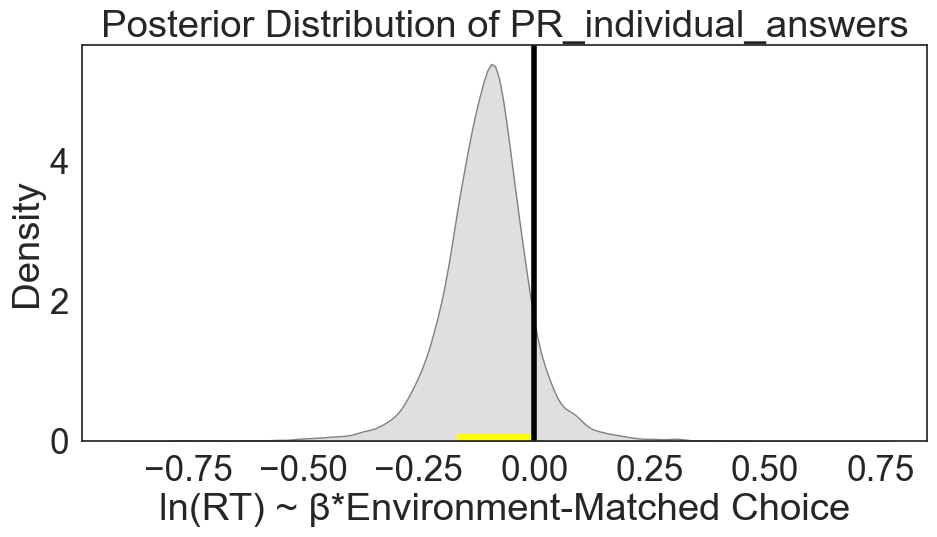

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style and scale of the plot
sns.set(style='white', font='arial', font_scale=2.3, rc={'figure.figsize': (8, 4.5)})

# Extract the posterior for 'PR_individual_answers'
posterior = fitted2.posterior['PR_individual_answers']

# Convert the posterior to a 1D array for Seaborn
posterior_1d = posterior.values.flatten()

# Define the limits of the horizontal bar
bar_min = -.168  # Example minimum value, modify as needed
bar_max = -0.006   # Example maximum value, modify as needed

# Create the KDE plot
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(posterior_1d, fill=True, color="gray")
plt.title('Posterior Distribution of PR_individual_answers')
plt.xlabel('ln(RT) ~ \u03B2*Environment-Matched Choice')
plt.ylabel('Density')

# Add a horizontal yellow bar at y=0
ax.hlines(0, bar_min, bar_max, colors='yellow', linewidth=10)  # alpha is for transparency
ax.axvline(x=0, color='black', linewidth=4)
plt.tight_layout()
plt.savefig('all_rt_posterior.png', dpi=300)
plt.show()
